In [1]:
! pip install -q kaggle

In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"zaytsevpavel1376","key":"262da53e6f5a27cf57b511695d855fd4"}'}

In [3]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

In [4]:
! kaggle datasets download -d humairmunir/gender-recognizer

Dataset URL: https://www.kaggle.com/datasets/humairmunir/gender-recognizer
License(s): apache-2.0
 97% 881M/904M [00:12<00:00, 84.8MB/s]
100% 904M/904M [00:12<00:00, 75.4MB/s]


In [5]:
! unzip '/content/gender-recognizer.zip' -d '/content'

Archive:  /content/gender-recognizer.zip
  inflating: /content/dataset/MEN/20240609_175821.jpg  
  inflating: /content/dataset/MEN/20240609_175941.jpg  
  inflating: /content/dataset/MEN/20240609_175959.jpg  
  inflating: /content/dataset/MEN/20240609_180022.jpg  
  inflating: /content/dataset/MEN/20240609_180035.jpg  
  inflating: /content/dataset/MEN/20240609_180108.jpg  
  inflating: /content/dataset/MEN/20240609_180139.jpg  
  inflating: /content/dataset/MEN/20240609_180204.jpg  
  inflating: /content/dataset/MEN/20240609_180239.jpg  
  inflating: /content/dataset/MEN/20240609_180301.jpg  
  inflating: /content/dataset/MEN/20240609_180315.jpg  
  inflating: /content/dataset/MEN/20240609_180342.jpg  
  inflating: /content/dataset/MEN/20240609_180401.jpg  
  inflating: /content/dataset/MEN/20240609_180425.jpg  
  inflating: /content/dataset/MEN/20240609_180459.jpg  
  inflating: /content/dataset/MEN/20240609_180525.jpg  
  inflating: /content/dataset/MEN/20240609_180539.jpg  
  infla

In [6]:
import shutil
shutil.rmtree('/content/dataset/WOMAN/MEN')
#как оказалось, структура папок была нарушена

In [7]:
datadir = '/content/dataset'

In [8]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import torch
from torch import nn, optim
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
from torchvision import datasets
import torchvision.transforms as T
from IPython.display import Image
from skimage import io
from torchvision.utils import make_grid

In [9]:
device = 'cuda' if torch.cuda.is_available() else 'cpu' # вычисления на графическом процессоре, если возможно
device

'cuda'

In [10]:
transform = T.Compose([T.Resize([256,256]), T.ToTensor()])

In [11]:
dataset=datasets.ImageFolder(datadir,transform=transform)

In [12]:
lenData = len(dataset)
lenTrain, lenTest = int(lenData*0.8)+1, int(lenData*0.2)
lenData

1292

In [13]:
train_dataset, test_dataset = torch.utils.data.random_split(dataset, [lenTrain, lenTest])

In [14]:
batch_size=32
train_loader = DataLoader(train_dataset, batch_size=batch_size,shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size,shuffle=True)

In [15]:
def show_batch(data_loader):
    for images, labels in data_loader:
        fig, ax = plt.subplots(figsize=(15, 15))
        ax.set_xticks([]); ax.set_yticks([])
        ax.imshow(make_grid(images[:32], nrow=8).permute(1, 2, 0).clamp(0,1))
        print(images.shape)
        break

torch.Size([32, 3, 256, 256])


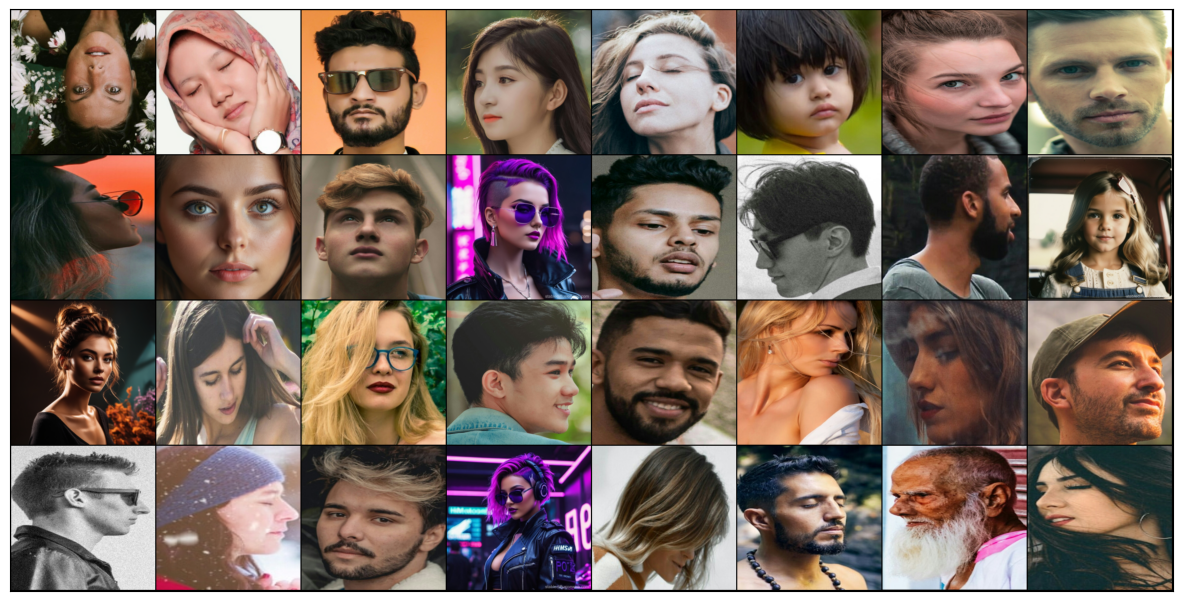

In [16]:
show_batch(train_loader)

In [17]:
! pip install efficientnet_pytorch

  Preparing metadata (setup.py) ... done
  Created wheel for efficientnet_pytorch: filename=efficientnet_pytorch-0.7.1-py3-none-any.whl size=16425 sha256=c90e64ddd7fd13194c1346191761ad3a5e8ac7bdd88a69b9ab51f16e3f6c6db1
  Stored in directory: /root/.cache/pip/wheels/03/3f/e9/911b1bc46869644912bda90a56bcf7b960f20b5187feea3baf
Successfully built efficientnet_pytorch


In [18]:
from efficientnet_pytorch import EfficientNet
model = EfficientNet.from_pretrained('efficientnet-b1')
model.to(device)

Downloading: "https://github.com/lukemelas/EfficientNet-PyTorch/releases/download/1.0/efficientnet-b1-f1951068.pth" to /root/.cache/torch/hub/checkpoints/efficientnet-b1-f1951068.pth
100%|██████████| 30.1M/30.1M [00:00<00:00, 159MB/s] 


Loaded pretrained weights for efficientnet-b1


EfficientNet(
  (_conv_stem): Conv2dStaticSamePadding(
    3, 32, kernel_size=(3, 3), stride=(2, 2), bias=False
    (static_padding): ZeroPad2d((0, 1, 0, 1))
  )
  (_bn0): BatchNorm2d(32, eps=0.001, momentum=0.010000000000000009, affine=True, track_running_stats=True)
  (_blocks): ModuleList(
    (0): MBConvBlock(
      (_depthwise_conv): Conv2dStaticSamePadding(
        32, 32, kernel_size=(3, 3), stride=[1, 1], groups=32, bias=False
        (static_padding): ZeroPad2d((1, 1, 1, 1))
      )
      (_bn1): BatchNorm2d(32, eps=0.001, momentum=0.010000000000000009, affine=True, track_running_stats=True)
      (_se_reduce): Conv2dStaticSamePadding(
        32, 8, kernel_size=(1, 1), stride=(1, 1)
        (static_padding): Identity()
      )
      (_se_expand): Conv2dStaticSamePadding(
        8, 32, kernel_size=(1, 1), stride=(1, 1)
        (static_padding): Identity()
      )
      (_project_conv): Conv2dStaticSamePadding(
        32, 16, kernel_size=(1, 1), stride=(1, 1), bias=False
    

In [19]:

model._fc=nn.Linear(1280,2)

In [20]:
! pip install torchinfo

In [55]:
from torchinfo import summary
summary(model,input_size=(1,3,256,256))

Layer (type:depth-idx)                             Output Shape              Param #
EfficientNet                                       [1, 2]                    --
├─Conv2dStaticSamePadding: 1-1                     [1, 32, 128, 128]         864
│    └─ZeroPad2d: 2-1                              [1, 3, 257, 257]          --
├─BatchNorm2d: 1-2                                 [1, 32, 128, 128]         64
├─MemoryEfficientSwish: 1-3                        [1, 32, 128, 128]         --
├─ModuleList: 1-4                                  --                        --
│    └─MBConvBlock: 2-2                            [1, 16, 128, 128]         --
│    │    └─Conv2dStaticSamePadding: 3-1           [1, 32, 128, 128]         288
│    │    └─BatchNorm2d: 3-2                       [1, 32, 128, 128]         64
│    │    └─MemoryEfficientSwish: 3-3              [1, 32, 128, 128]         --
│    │    └─Conv2dStaticSamePadding: 3-4           [1, 8, 1, 1]              264
│    │    └─MemoryEfficientSwish

In [22]:
optimizer = optim.Adam(model.parameters())
criterion = nn.CrossEntropyLoss()

In [23]:
!pip install pytorch-ignite --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 312.7/312.7 kB 5.9 MB/s eta 0:00:00


In [24]:
from ignite.engine import Events, create_supervised_trainer, create_supervised_evaluator
from ignite.metrics import Accuracy, Loss, RunningAverage, ConfusionMatrix
from ignite.handlers import ModelCheckpoint, EarlyStopping
from ignite.contrib.handlers import ProgressBar, HandlersTimeProfiler
from ignite.handlers import Checkpoint, global_step_from_engine

/usr/local/lib/python3.10/dist-packages/ignite/handlers/checkpoint.py:16: DeprecationWarning: `TorchScript` support for functional optimizers is deprecated and will be removed in a future PyTorch release. Consider using the `torch.compile` optimizer instead.
  from torch.distributed.optim import ZeroRedundancyOptimizer


In [25]:
trainer = create_supervised_trainer(model, optimizer, criterion, device=device)

In [26]:
metrics = { "loss" : Loss(criterion),
           "accuracy" : Accuracy(),
            "cm": ConfusionMatrix(num_classes=2)}

In [27]:
train_evaluator = create_supervised_evaluator(model, metrics = metrics, device = device)
test_evaluator = create_supervised_evaluator(model, metrics = metrics, device = device)

In [28]:
training_history = {'accuracy':[],'loss':[]}
test_history = {'accuracy':[],'loss':[]}
last_epoch = []

In [29]:
@trainer.on(Events.EPOCH_COMPLETED)
def log_training_results(trainer):
    train_evaluator.run(train_loader)
    metrics = train_evaluator.state.metrics
    accuracy = metrics['accuracy']*100
    loss = metrics['loss']
    last_epoch.append(0)
    training_history['accuracy'].append(accuracy)
    training_history['loss'].append(loss)
    print("Результат обучения - Эпоха: {}  Сред. точность: {:.2f} Сред. ошибка: {:.5f}"
          .format(trainer.state.epoch, accuracy, loss))

In [30]:
@trainer.on(Events.EPOCH_COMPLETED)
def log_test_results(trainer):
    test_evaluator.run(test_loader)
    metrics = test_evaluator.state.metrics
    accuracy = metrics['accuracy']*100
    loss = metrics['loss']
    test_history['accuracy'].append(accuracy)
    test_history['loss'].append(loss)
    print("Результат валидации - Эпоха: {}  Сред. точность: {:.2f} Сред. ошибка: {:.5f}"
          .format(trainer.state.epoch, accuracy, loss))

In [31]:
breaker = EarlyStopping(patience = 10, score_function = lambda engine : engine.state.metrics['accuracy'],
                        trainer = trainer)
test_evaluator.add_event_handler(Events.COMPLETED, breaker);

In [32]:
to_save = {'model': model}
saver = Checkpoint(
    to_save, './models',
    n_saved=1, filename_prefix='best',
    score_name="accuracy",
    global_step_transform=global_step_from_engine(trainer),
)
test_evaluator.add_event_handler(Events.COMPLETED, saver);

In [33]:
from tqdm.notebook import tqdm
profiler = HandlersTimeProfiler()
profiler.attach(trainer)
pbar = ProgressBar(persist=True,
    bar_format = '')
pbar.attach(trainer, output_transform = lambda x : {"loss" : x})

/usr/local/lib/python3.10/dist-packages/ignite/handlers/tqdm_logger.py:127: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


In [34]:
@trainer.on(Events.COMPLETED)
def log_confusion_matrix(trainer):
    test_evaluator.run(test_loader)
    metrics = test_evaluator.state.metrics
    cm = metrics['cm']
    cm = cm.numpy()
    cm = cm.astype(int)
    classes = dataset.classes
    fig, ax = plt.subplots(figsize=(10,10))
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax,fmt="d")
    # labels, title and ticks
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix')
    ax.xaxis.set_ticklabels(classes,rotation=90)
    ax.yaxis.set_ticklabels(classes,rotation=0)

  3%|3         | 1/33 [00:00<?, ?it/s]

Результат обучения - Эпоха: 1  Сред. точность: 95.84 Сред. ошибка: 0.13125
Результат валидации - Эпоха: 1  Сред. точность: 93.41 Сред. ошибка: 0.56264


  3%|3         | 1/33 [00:00<?, ?it/s]

Результат обучения - Эпоха: 2  Сред. точность: 92.36 Сред. ошибка: 0.27778
Результат валидации - Эпоха: 2  Сред. точность: 87.98 Сред. ошибка: 0.56282


  3%|3         | 1/33 [00:00<?, ?it/s]

Результат обучения - Эпоха: 3  Сред. точность: 95.45 Сред. ошибка: 0.11539
Результат валидации - Эпоха: 3  Сред. точность: 89.92 Сред. ошибка: 0.41683


  3%|3         | 1/33 [00:00<?, ?it/s]

Результат обучения - Эпоха: 4  Сред. точность: 97.49 Сред. ошибка: 0.08462
Результат валидации - Эпоха: 4  Сред. точность: 93.80 Сред. ошибка: 0.35736


  3%|3         | 1/33 [00:00<?, ?it/s]

Результат обучения - Эпоха: 5  Сред. точность: 97.87 Сред. ошибка: 0.05524
Результат валидации - Эпоха: 5  Сред. точность: 93.02 Сред. ошибка: 0.31160


State:
	iteration: 165
	epoch: 5
	epoch_length: 33
	max_epochs: 5
	output: 0.000713066547177732
	batch: <class 'list'>
	metrics: <class 'dict'>
	dataloader: <class 'torch.utils.data.dataloader.DataLoader'>
	seed: <class 'NoneType'>
	times: <class 'dict'>

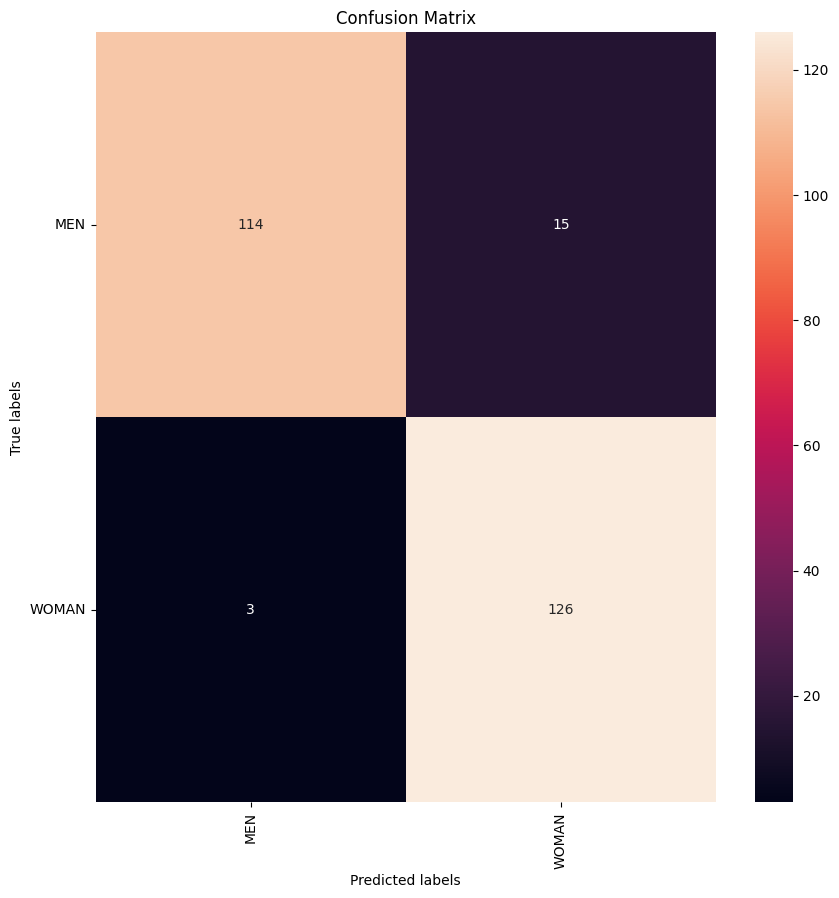

In [35]:
trainer.run(train_loader, max_epochs=5)

In [36]:
def fetch_last_checkpoint_model_filename(model_save_path):
    import os
    checkpoint_files = os.listdir(model_save_path)
    checkpoint_files = [f for f in checkpoint_files if '.pt' in f]
    checkpoint_iter = [
        int(x.split('_')[2].split('.')[0])
        for x in checkpoint_files]
    last_idx = np.array(checkpoint_iter).argmax()
    return os.path.join(model_save_path, checkpoint_files[last_idx])

model.load_state_dict(torch.load(fetch_last_checkpoint_model_filename('/content/models')))
print("Модель загружена")

Модель загружена


<ipython-input-36-02be131d5380>:11: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(fetch_last_checkpoint_model_filename('/content/models')))


In [37]:
def get_preds(model, loader, device):
  model.eval()
  y_true = torch.tensor([], dtype=torch.long, device=device)
  all_outputs = torch.tensor([], device=device)

  with torch.no_grad():
      for data in test_loader:
          inputs = [i.to(device) for i in data[:-1]]
          labels = data[-1].to(device)

          outputs = model(*inputs)
          y_true = torch.cat((y_true, labels), 0)
          all_outputs = torch.cat((all_outputs, outputs), 0)

      y_true = y_true.cpu().numpy()
      _, y_pred = torch.max(all_outputs, 1)
      y_pred = y_pred.cpu().numpy()
      y_pred_prob = F.softmax(all_outputs, dim=1).cpu().numpy()

  return y_true, y_pred, y_pred_prob

In [38]:
y_true, y_pred, _ = get_preds(model, test_loader, device)

In [39]:
from sklearn.metrics import matthews_corrcoef, classification_report

In [40]:
print(classification_report(y_true, y_pred, target_names=dataset.classes))

              precision    recall  f1-score   support

         MEN       1.00      0.88      0.93       129
       WOMAN       0.89      1.00      0.94       129

    accuracy                           0.94       258
   macro avg       0.94      0.94      0.94       258
weighted avg       0.94      0.94      0.94       258



In [41]:
matthews_corrcoef(y_true,y_pred)

0.8827855599337737

In [46]:
from IPython.display import Image as Image1

In [47]:
from PIL import Image

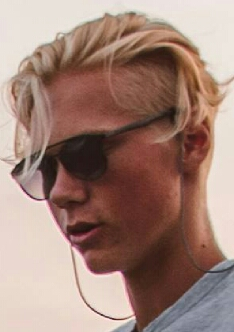

In [69]:
Image1('/content/dataset/MEN/20240609_175941.jpg')

In [68]:
img=Image.open('/content/dataset/MEN/20240609_175941.jpg')
tr=T.Compose([T.Resize([256,256]),T.ToTensor()])
tensor=tr(img)
tensor = tensor.to(device)
tensor = tensor.unsqueeze_(0)
model.eval()
output=model(tensor)
F.softmax(output.to('cpu'), dim=1)

tensor([[9.9956e-01, 4.4403e-04]], grad_fn=<SoftmaxBackward0>)

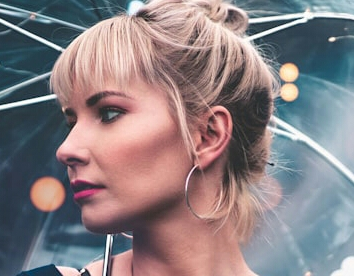

In [70]:
Image1('/content/dataset/WOMAN/0005.jpg')

In [71]:
img=Image.open('/content/margoRoby.jpg')
tr=T.Compose([T.Resize([256,256]),T.ToTensor()])
tensor=tr(img)
tensor = tensor.to(device)
tensor = tensor.unsqueeze_(0)
model.eval()
output=model(tensor)
F.softmax(output.to('cpu'), dim=1)

tensor([[2.5357e-07, 1.0000e+00]], grad_fn=<SoftmaxBackward0>)

Данная модель работает с веьма высокой точностью, на что указывают высокие значения метрик f1, accurcy и другие.
